##### Stop Words
- the ,for,from etc
- Machine learning(translation),Sentiment anaylsis type not remove

In [2]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
len(STOP_WORDS)

326

In [3]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("We just opened our wings, the flying part is coming soon")
for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


In [20]:
def preprocess(text):
    doc = nlp(text)
    no_stop_word = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(no_stop_word)

In [21]:
preprocess("We just opened our wings, the flying part is coming soon")

'opened wings flying coming soon'

In [11]:
preprocess("Musk wants time to prepare for a trail over his")

['Musk', 'wants', 'time', 'prepare', 'trail']

In [13]:
import pandas as pd
df=pd.read_json("E:DS/Datasets/USRep.json",lines=True)
df.head()

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [14]:
df= df[df.topics.str.len()!=0]
df.head(5)

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [15]:
df=df.head(100)
df.shape

(100, 6)

In [19]:
df.contents.iloc[0]

"The U.S. Department of Justice, the U.S. Environmental Protection Agency (EPA), and the Rhode Island Department of Environmental Management (RIDEM) announced today that two subsidiaries of Stanley Black & Decker Inc.—Emhart Industries Inc. and Black & Decker Inc.—have agreed to clean up dioxin contaminated sediment and soil at the Centredale Manor Restoration Project Superfund Site in North Providence and Johnston, Rhode Island.\xa0 “We are pleased to reach a resolution through collaborative work with the responsible parties, EPA, and other stakeholders,” said\xa0Acting Assistant Attorney General Jeffrey H. Wood for the Justice Department's\xa0Environment and Natural Resources Division . “Today’s settlement ends protracted litigation and allows for important work to get underway to restore a healthy environment for citizens living in and around the Centredale Manor Site and the Woonasquatucket River.” “This settlement demonstrates the tremendous progress we are achieving working with 

In [22]:
df["New_Contents"]=df.contents.apply(preprocess)
df.head()

,id,title,contents,date,topics,components,New_Contents
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],U.S. Department Justice U.S. Environmental Pro...
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],131 count criminal indictment unsealed today B...
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...",United States Attorney Office Middle District ...
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],21st Century Oncology LLC agreed pay $ 19.75 m...
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]",21st Century Oncology Inc. certain subsidiarie...


In [24]:
len(df.contents.iloc[0]),len(df.New_Contents.iloc[0])

(6286, 4574)

#### BOW n-gram
- pair of word bi-gram n=2
- tri-gram 3 words n=3
- by defualt BOW is n=1
###### Disadvantages
- Sparsity and dimensionality increase
- OOV(out of vocabulary)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(1,4))
v.fit_transform(["Thor is looking for a job"])
v.vocabulary_


{'thor': 10,
 'is': 2,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor is': 11,
 'is looking': 3,
 'looking for': 8,
 'for job': 1,
 'thor is looking': 12,
 'is looking for': 4,
 'looking for job': 9,
 'thor is looking for': 13,
 'is looking for job': 5}

In [31]:
t=[
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [1]:
import spacy
nlp=spacy.load("en_core_web_sm")
def preprocess(text):
    doc=nlp(text)
    filter_tokns=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(filter_tokns)

In [37]:
tt=[preprocess(text) for text in t]
tt

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [39]:
v=CountVectorizer(ngram_range=(1,2))
v.fit_transform(tt)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [42]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [43]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [2]:
import pandas as pd
df=pd.read_json("E:DS/Datasets/News_Category_Dataset_v3.json",lines=True)

In [3]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [4]:
len(df.category.unique())
category=df.category.unique()
category

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [5]:
min_sample = 1014
dff=[]
for i in range(42):
    dff.append(df[df.category==category[i]].sample(min_sample,random_state=42))


In [6]:
df=pd.concat(dff,axis=0)

In [7]:
df.sample(5)

,link,headline,category,short_description,authors,date
125833,https://www.huffingtonpost.com/entry/black-phi...,Black Philadelphians and Their Ungodly Fear of...,BLACK VOICES,"To hell with political correctness, it's time ...","Christopher Norris, ContributorCEO, Techbook O...",2014-07-18
122489,https://www.huffingtonpost.com/entry/chloe-mor...,We Wish We Could Do Our Makeup Like This Every...,STYLE,,Dana Oliver,2014-08-24
130995,https://www.huffingtonpost.com/entry/personal-...,5 Easy Ways To Feel Totally Transformed (Even ...,HEALTHY LIVING,"""Transformed"" is a big word, but the process d...","Erin Motz, ContributorYoga Teacher & Bad Yogi",2014-05-20
105759,https://www.huffingtonpost.com/entry/5-supermo...,5 Supermodels Share Their Must-Have Beauty Pro...,STYLE,,"Modelinia, ContributorYour one stop for everyt...",2015-03-05
6822,https://www.huffpost.com/entry/fcc-one-ring-ro...,FCC Warns Of 'One-Ring' Robocall Scheme That C...,U.S. NEWS,Scammers let phones ring once. If people call ...,Sanjana Karanth,2019-05-07


In [8]:
key=[k for k in range(42)]
col=dict(zip(category,key))
col


{'U.S. NEWS': 0,
 'COMEDY': 1,
 'PARENTING': 2,
 'WORLD NEWS': 3,
 'CULTURE & ARTS': 4,
 'TECH': 5,
 'SPORTS': 6,
 'ENTERTAINMENT': 7,
 'POLITICS': 8,
 'WEIRD NEWS': 9,
 'ENVIRONMENT': 10,
 'EDUCATION': 11,
 'CRIME': 12,
 'SCIENCE': 13,
 'WELLNESS': 14,
 'BUSINESS': 15,
 'STYLE & BEAUTY': 16,
 'FOOD & DRINK': 17,
 'MEDIA': 18,
 'QUEER VOICES': 19,
 'HOME & LIVING': 20,
 'WOMEN': 21,
 'BLACK VOICES': 22,
 'TRAVEL': 23,
 'MONEY': 24,
 'RELIGION': 25,
 'LATINO VOICES': 26,
 'IMPACT': 27,
 'WEDDINGS': 28,
 'COLLEGE': 29,
 'PARENTS': 30,
 'ARTS & CULTURE': 31,
 'STYLE': 32,
 'GREEN': 33,
 'TASTE': 34,
 'HEALTHY LIVING': 35,
 'THE WORLDPOST': 36,
 'GOOD NEWS': 37,
 'WORLDPOST': 38,
 'FIFTY': 39,
 'ARTS': 40,
 'DIVORCE': 41}

In [9]:
df.category.value_counts()

U.S. NEWS         1014
ARTS & CULTURE    1014
TRAVEL            1014
MONEY             1014
RELIGION          1014
LATINO VOICES     1014
IMPACT            1014
WEDDINGS          1014
COLLEGE           1014
PARENTS           1014
STYLE             1014
COMEDY            1014
GREEN             1014
TASTE             1014
HEALTHY LIVING    1014
THE WORLDPOST     1014
GOOD NEWS         1014
WORLDPOST         1014
FIFTY             1014
ARTS              1014
BLACK VOICES      1014
WOMEN             1014
HOME & LIVING     1014
QUEER VOICES      1014
PARENTING         1014
WORLD NEWS        1014
CULTURE & ARTS    1014
TECH              1014
SPORTS            1014
ENTERTAINMENT     1014
POLITICS          1014
WEIRD NEWS        1014
ENVIRONMENT       1014
EDUCATION         1014
CRIME             1014
SCIENCE           1014
WELLNESS          1014
BUSINESS          1014
STYLE & BEAUTY    1014
FOOD & DRINK      1014
MEDIA             1014
DIVORCE           1014
Name: category, dtype: int64

In [10]:
df['category_num']=df.category.map(col)

In [11]:
df.sample(5)

,link,headline,category,short_description,authors,date,category_num
38499,https://www.huffingtonpost.com/entry/on-colleg...,"On College Essays, #BlackLivesMatter, and Acti...",BLACK VOICES,Writing a hashtag about Black liberation 100 t...,"Mona Hagmagid, ContributorStudent",2017-04-08,22
200831,https://www.huffingtonpost.comhttp://www.theat...,What's So Crazy About An Arranged Marriage?,WEDDINGS,"Nell Freudenberger's new novel, ""The Newlyweds...",,2012-05-01,28
129097,https://www.huffingtonpost.com/entry/fda-banni...,Infuriated Cheese Lovers Prompt FDA To Reverse...,TASTE,"You guys, we #Savedthecheese with these AWESOM...",Carly Ledbetter,2014-06-11,34
142359,https://www.huffingtonpost.com/entry/father-so...,Father's Beautiful Journey With Son Who Has Do...,PARENTING,When doctors told Pablo Poncini his son may ha...,Ron Dicker,2014-01-14,2
19293,https://www.huffingtonpost.com/entry/jingle-ja...,'Riverdale' Fans Can Get A 'Jingle Jangle' Fix...,ENTERTAINMENT,"Don't worry, the only drug here is chocolate.",Doha Madani,2017-11-30,7


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.short_description.values,df.category_num.values,test_size=0.2,
                                                 random_state=42,stratify=df.category_num)

In [13]:
#y_train.value_counts()

In [14]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date',
       'category_num'],
      dtype='object')

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
clf = Pipeline(
[
    ("vectorizer",CountVectorizer()),
    ('nb',MultinomialNB())
    
])

In [17]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [18]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.35      0.26      0.30       281
           1       0.05      0.32      0.09        31
           2       0.34      0.16      0.22       445
           3       0.19      0.37      0.25       103
           4       0.40      0.06      0.11      1271
           5       0.23      0.55      0.33        85
           6       0.19      0.67      0.29        57
           7       0.02      0.42      0.05        12
           8       0.26      0.42      0.32       123
           9       0.01      0.75      0.03         4
          10       0.41      0.31      0.36       264
          11       0.55      0.26      0.35       435
          12       0.23      0.43      0.30       106
          13       0.14      0.60      0.23        48
          14       0.54      0.14      0.22       801
          15       0.12      0.23      0.16       107
          16       0.38      0.42      0.40       182
          17       0.23    

In [19]:
df["pre_disc"]=df.short_description.apply(preprocess)
df.head()

,link,headline,category,short_description,authors,date,category_num,pre_disc
3864,https://www.huffpost.com/entry/colorado-couple...,Couple Married For 68 Years Dies In Colorado W...,U.S. NEWS,A relative said they were found in each other'...,Sara Boboltz,2020-10-24,0,relative say find arm
3255,https://www.huffpost.com/entry/volunteer-army-...,Volunteer Army Helps Florida Elders Book Covet...,U.S. NEWS,Volunteers are helping older people clear the ...,"ADRIANA GOMEZ LICON, Associated Press",2021-02-05,0,volunteer help old people clear daunting hurdl...
5333,https://www.huffpost.com/entry/frustration-in-...,Frustration In Colorado City As Cop Found Drun...,U.S. NEWS,A district attorney has complained that he was...,Sara Boboltz,2020-02-07,0,district attorney complain legally able prosec...
6552,https://www.huffpost.com/entry/911-first-respo...,9/11 First Responder Who Asked Congress To Ext...,U.S. NEWS,Luis Alvarez appeared alongside Jon Stewart at...,,2019-06-29,0,Luis Alvarez appear alongside Jon Stewart cong...
5437,https://www.huffpost.com/entry/airlines-china-...,U.S. To Screen Airline Passengers From China F...,U.S. NEWS,The new virus that has sickened dozens and kil...,,2020-01-17,0,new virus sicken dozen kill prompt worry new i...


In [22]:
X_train,X_test,y_train,y_test = train_test_split(df.pre_disc.values,df.category_num.values,test_size=0.2,
                                                 random_state=42,stratify=df.category_num)

In [23]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [24]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.33      0.21      0.26       311
           1       0.11      0.33      0.17        69
           2       0.36      0.18      0.24       396
           3       0.24      0.39      0.30       127
           4       0.42      0.06      0.11      1298
           5       0.35      0.45      0.39       159
           6       0.25      0.50      0.34       101
           7       0.08      0.38      0.14        45
           8       0.28      0.29      0.29       195
           9       0.03      0.41      0.06        17
          10       0.42      0.33      0.37       263
          11       0.59      0.31      0.41       378
          12       0.25      0.36      0.29       138
          13       0.22      0.56      0.32        81
          14       0.47      0.19      0.27       488
          15       0.19      0.26      0.22       149
          16       0.50      0.39      0.44       259
          17       0.35    

#### TF_IDF
- Doc Freq (DF) =  Total Docs / Number of times t(word) is present
- IDF = log( Total Docs / Number of times t(word) is present)
- TF(t,d) = (Tot time t in doc A/ total doc len in doc A)
- IDF(t) = log(total doc len in doc A/Tot time t in doc A )

**Note: Lower IDF means more times t(word appear)**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpous=[
    "Thor is eatint pizza",
    "Apple is iphone brand",
    "Tesla is Alon Musk company",
    "Microsoft is annoucing new Window",
    "I am eating biryani"
]

In [32]:
v=TfidfVectorizer()
tfidf=v.fit_transform(corpous)

In [29]:
v.vocabulary_

{'thor': 16,
 'is': 10,
 'eatint': 8,
 'pizza': 14,
 'apple': 3,
 'iphone': 9,
 'brand': 5,
 'tesla': 15,
 'alon': 0,
 'musk': 12,
 'company': 6,
 'microsoft': 11,
 'annoucing': 2,
 'new': 13,
 'window': 17,
 'am': 1,
 'eating': 7,
 'biryani': 4}

In [30]:
feature_names=v.get_feature_names_out()

In [31]:
for word in feature_names:
    indx = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[indx]}")

alon 2.09861228866811
am 2.09861228866811
annoucing 2.09861228866811
apple 2.09861228866811
biryani 2.09861228866811
brand 2.09861228866811
company 2.09861228866811
eating 2.09861228866811
eatint 2.09861228866811
iphone 2.09861228866811
is 1.1823215567939547
microsoft 2.09861228866811
musk 2.09861228866811
new 2.09861228866811
pizza 2.09861228866811
tesla 2.09861228866811
thor 2.09861228866811
window 2.09861228866811


**Note** is have less score it present almost in every Documents

In [33]:
tfidf.toarray()[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.54903633, 0.        ,
        0.30931749, 0.        , 0.        , 0.        , 0.54903633,
        0.        , 0.54903633, 0.        ],
       [0.        , 0.        , 0.        , 0.54903633, 0.        ,
        0.54903633, 0.        , 0.        , 0.        , 0.54903633,
        0.30931749, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [34]:
corpous[:2]

['Thor is eatint pizza', 'Apple is iphone brand']

In [35]:
import pandas as pd

In [37]:
df=pd.read_csv("E:DS/Datasets/ecommerceDataset.csv",names=['label','decs'])
df.head()

,label,decs
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [38]:
df.shape

(50425, 2)

In [39]:
df.label.unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [45]:
df.isnull().sum()

label           0
decs            1
category_num    0
dtype: int64

In [46]:
df.dropna(axis=0,inplace=True)

In [47]:
df['category_num']=df.label.map({
   'Household':0, 'Books':1, 'Clothing & Accessories':3, 'Electronics':4 
})

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df.decs.values,df.category_num.values,test_size=0.2,
                                                 random_state=42,stratify=df.label)

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
clf = Pipeline(
[
    ("TfIdf",TfidfVectorizer()),
    ('nb',MultinomialNB())
    
])

In [53]:
clf.fit(X_train,y_train)

Pipeline(steps=[('TfIdf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [54]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      4221
           1       0.92      0.97      0.95      2233
           3       0.93      0.98      0.96      1650
           4       0.90      0.96      0.93      1981

    accuracy                           0.94     10085
   macro avg       0.93      0.95      0.94     10085
weighted avg       0.94      0.94      0.94     10085



<AxesSubplot:>

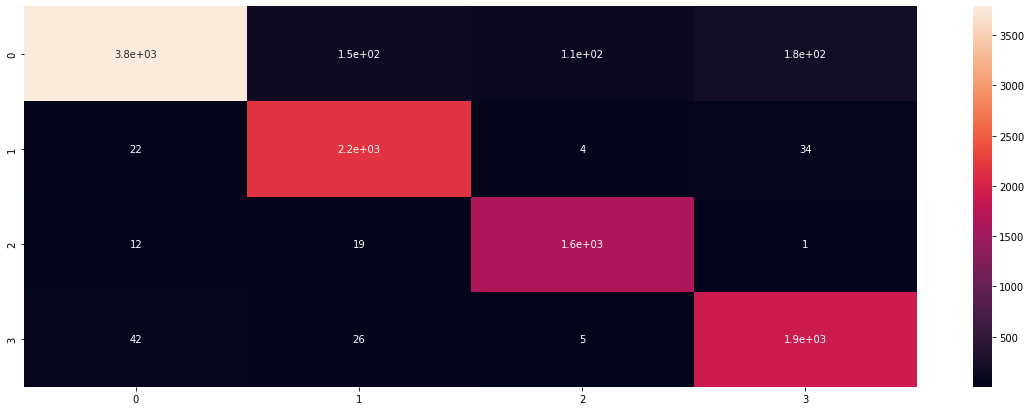

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(confusion_matrix(clf.predict(X_test),y_test),annot=True)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
clf = Pipeline(
[
    ("TfIdf",TfidfVectorizer()),
    ('nb',KNeighborsClassifier())
    
])

In [58]:
clf.fit(X_train,y_train)

Pipeline(steps=[('TfIdf', TfidfVectorizer()), ('nb', KNeighborsClassifier())])

In [59]:
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3930
           1       0.95      0.96      0.96      2326
           3       0.97      0.97      0.97      1746
           4       0.94      0.96      0.95      2083

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



<AxesSubplot:>

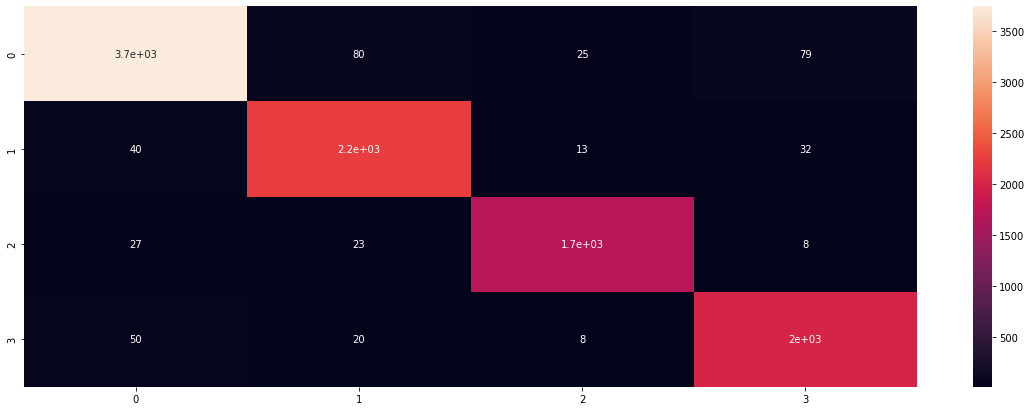

In [60]:
plt.figure(figsize=(20,7))
sns.heatmap(confusion_matrix(clf.predict(X_test),y_test),annot=True)

In [ ]:
#!python -m spacy download en_core_web_lg

In [1]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [2]:
doc=nlp("dog cat banana Twitter Rizwan")
for toke in doc:
    print(toke.text,toke.has_vector,toke.is_oov)

dog True False
cat True False
banana True False
Twitter True False
Rizwan True False


In [3]:
doc[0].vector.shape

(300,)

In [4]:
base_token=nlp("bread")
base_token.vector.shape

(300,)

In [8]:
doc = nlp("bread roti carrot sandwich burger car tiger human wheat")
for token in doc:
    print(f"{token.text}<->{base_token.text}",token.similarity(base_token))

bread<->bread 1.0
roti<->bread 0.556629228182715
carrot<->bread 0.5297989983824242
sandwich<->bread 0.6341067010130894
burger<->bread 0.47520687769584247
car<->bread 0.06451532596945217
tiger<->bread 0.04764611272488976
human<->bread 0.2151154210812192
wheat<->bread 0.615036141030184


In [10]:
def print_sim(base_wrod,words_to_comp):
    base_token = nlp(base_wrod)
    doc = nlp(words_to_comp)
    for token in doc:
        print(f"{token.text}<->{base_token.text}",token.similarity(base_token))

In [11]:
print_sim("iphone","apple samsung iphone dog")

apple<->iphone 0.4387907748060368
samsung<->iphone 0.6708590303423401
iphone<->iphone 1.0
dog<->iphone 0.08211864228011527


In [12]:
king = nlp("king").vector
queen = nlp("queen").vector
man = nlp("man").vector
woman = nlp("woman").vector
res = king - man + woman

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([res],[queen])

array([[0.6178014]], dtype=float32)

#### Fake news classification using spacy

In [14]:
import pandas as pd
df=pd.read_csv("E:DS/Datasets/FakeNewsNet.csv")

In [15]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [16]:
df.columns

Index(['title', 'news_url', 'source_domain', 'tweet_num', 'real'], dtype='object')

In [19]:
df=df.drop(['news_url', 'source_domain', 'tweet_num'],axis=1)
df.head()

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1


In [20]:
df.title.isna().sum()

0

In [22]:
df.real.value_counts()

1    17441
0     5755
Name: real, dtype: int64

In [28]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [47]:
(17441+5755)/3

7732.0

In [62]:
t1=df.iloc[:7732][df.real==1]
t1.shape

C:\Users\RizzWann\AppData\Local\Temp\ipykernel_7524\3550541073.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t1=df.iloc[:7732][df.real==1]


(5856, 2)

In [52]:
7732*2

15464

In [63]:
t2=df.iloc[7732:15464][df.real==1]
t2.shape

C:\Users\RizzWann\AppData\Local\Temp\ipykernel_7524\4186820282.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t2=df.iloc[7732:15464][df.real==1]


(5825, 2)

In [55]:
15464+7732

23196

In [64]:
t3=df.iloc[15464:][df.real==1]
t3.shape

C:\Users\RizzWann\AppData\Local\Temp\ipykernel_7524\3124829769.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t3=df.iloc[15464:][df.real==1]


(5760, 2)

In [65]:
t4=df.iloc[:][df.real==0]
t4.shape

(5755, 2)

In [66]:
df1=pd.concat([t1,t4],axis=0)
df2=pd.concat([t2,t4],axis=0)
df3=pd.concat([t3,t4],axis=0)
df1.shape

(11611, 2)

In [67]:
df1.head()

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1


In [68]:
df1.real.value_counts()

1    5856
0    5755
Name: real, dtype: int64

In [74]:
df1['vect']=df1.title.apply(lambda x:nlp(x).vector)

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
# Split
X_train,X_test,y_train,y_test = train_test_split(df1.vect.values,df1.real.values,test_size=0.2,
# 2D                                                  random_state=42,stratify=df1.real)
X_train2d=np.stack(X_train)
X_test2d = np.stack(X_test)
#model
clf =Pipeline(
[

    ("Scalled",MinMaxScaler()),
    ("GB",MultinomialNB())
]
)

In [82]:
clf.fit(X_train2d,y_train)

Pipeline(steps=[('Scalled', MinMaxScaler()), ('GB', MultinomialNB())])

In [83]:
y_pred=clf.predict(X_test2d)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1070
           1       0.66      0.62      0.64      1253

    accuracy                           0.62      2323
   macro avg       0.62      0.62      0.62      2323
weighted avg       0.62      0.62      0.62      2323



In [93]:
df1["pre"]= df1.title.apply(preprocessing)

In [87]:
def preprocessing(x):
    doc = nlp(x)
    pre=[]
    for token in doc:
        if not token.is_stop:
            pre.append(token.lemma_)
    return " ".join(pre)         

In [94]:
df1.head()

,title,real,vect,pre
0,Kandi Burruss Explodes Over Rape Accusation on...,1,"[-1.8459933, -1.2705841, 2.4423392, 1.4046179,...",Kandi Burruss explode rape accusation ' real H...
1,People's Choice Awards 2018: The best red carp...,1,"[-0.23142634, -0.1408, 0.120002694, 0.48099002...",People Choice Awards 2018 : good red carpet look
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1,"[-0.7072502, 0.018810077, 2.7804487, -0.417446...",Sophia Bush send Sweet Birthday message ' Tree...
3,Colombian singer Maluma sparks rumours of inap...,1,"[-2.004871, -0.55445, -0.49338102, -0.38223603...",colombian singer Maluma spark rumour inappropr...
4,Gossip Girl 10 Years Later: How Upper East Sid...,1,"[-1.4475666, -1.1273211, 1.6724533, 0.29957396...",Gossip Girl 10 year later : Upper East Siders ...


In [95]:
df1['vect']=df1.pre.apply(lambda x:nlp(x).vector)

In [100]:
# Split
X_train,X_test,y_train,y_test = train_test_split(df1.vect.values,df1.real.values,test_size=0.2)
# 2D                                                  random_state=42,stratify=df1.real)
X_train2d=np.stack(X_train)
X_test2d = np.stack(X_test)
#model
clf =Pipeline(
[

    ("Scalled",MinMaxScaler()),
    ("GB",MultinomialNB())
]
)
clf.fit(X_train2d,y_train)
print(classification_report(clf.predict(X_test2d),y_test))

In [102]:
clf.fit(X_train2d,y_train)

Pipeline(steps=[('Scalled', MinMaxScaler()), ('GB', MultinomialNB())])

In [103]:
print(classification_report(clf.predict(X_test2d),y_test))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1164
           1       0.64      0.65      0.64      1159

    accuracy                           0.64      2323
   macro avg       0.64      0.64      0.64      2323
weighted avg       0.64      0.64      0.64      2323



In [104]:
from sklearn.neighbors import KNeighborsClassifier
clf =Pipeline(
[

    ("Scalled",MinMaxScaler()),
    ("GB",KNeighborsClassifier())
]
)
clf.fit(X_train2d,y_train)
print(classification_report(clf.predict(X_test2d),y_test))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1252
           1       0.65      0.71      0.68      1071

    accuracy                           0.69      2323
   macro avg       0.69      0.69      0.69      2323
weighted avg       0.69      0.69      0.69      2323



In [ ]:
import gensim.downloader as api
wv=api.load("word2vec-google-news-300")

[--------------------------------------------------] 0.7% 11.4/1662.8MB downloaded

In [3]:
from gensim.models import Word2Vec as wv